In [ ]:
'''Replace Headers
Format data into a more readable format
Identify outliers and bad data
Find duplicates
Fix casing or inconsistent values
Conduct Fuzzy Matchin'''

In [124]:
import pandas as pd #import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import matplotlib.ticker as ticker
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from Levenshtein import distance
import datetime as dt
import numpy as np

In [2]:
fl=(r"C:\Users\rdanda\OneDrive - Microsoft\Documents\Bellevue\DSC 540 Data Preparation\true_car_listings.csv")

In [3]:
df=pd.read_csv(fl) # Read the file in to dataframe

In [4]:
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [5]:
df.columns=['PRICE','YEAR','MILEAGE','CITY','STATE','VIN','MAKE','MODEL'] #rename column names

In [6]:
df

,PRICE,YEAR,MILEAGE,CITY,STATE,VIN,MAKE,MODEL
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [7]:
df.describe()

,PRICE,YEAR,MILEAGE
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [8]:
df['PRICEwc']=df.PRICE.apply(lambda x : "{:,}".format(x)) #Thousand seperator for Price (not inplace leaving it as )

In [9]:
df['MILAGEwc']=df.MILEAGE.apply(lambda x : "{:,}".format(x)) #Thousand seperator for Millage

In [10]:
df

,PRICE,YEAR,MILEAGE,CITY,STATE,VIN,MAKE,MODEL,PRICEwc,MILAGEwc
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,"8,995","35,725"
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,"10,888","19,606"
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,"8,995","48,851"
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,"10,999","39,922"
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,"14,799","22,142"
...,...,...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6,"63,215",9
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6,"72,260","3,201"
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD,"55,999","28,941"
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90,"60,240","3,005"


In [134]:
c_year = int(dt.datetime.now().year) #get current year

In [139]:
df['AGE_Calcuated']=c_year - df['YEAR'] #create new column AGE substracting year made to current year

In [144]:
df

,PRICE,YEAR,MILEAGE,CITY,STATE,VIN,MAKE,MODEL,PRICEwc,MILAGEwc,AGE_Calcuated
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,"8,995","35,725",6
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,"10,888","19,606",7
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,"8,995","48,851",7
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,"10,999","39,922",6
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,"14,799","22,142",4
...,...,...,...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6,"63,215",9,3
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6,"72,260","3,201",3
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD,"55,999","28,941",4
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90,"60,240","3,005",3


In [11]:
df.isnull().values.any() #Finding null values in datafram


False

In [12]:
df.isnull().sum() #counting null values in dataframe

PRICE       0
YEAR        0
MILEAGE     0
CITY        0
STATE       0
VIN         0
MAKE        0
MODEL       0
PRICEwc     0
MILAGEwc    0
dtype: int64

In [13]:
df.isnull().sum().sum() #total null values in datafram

0

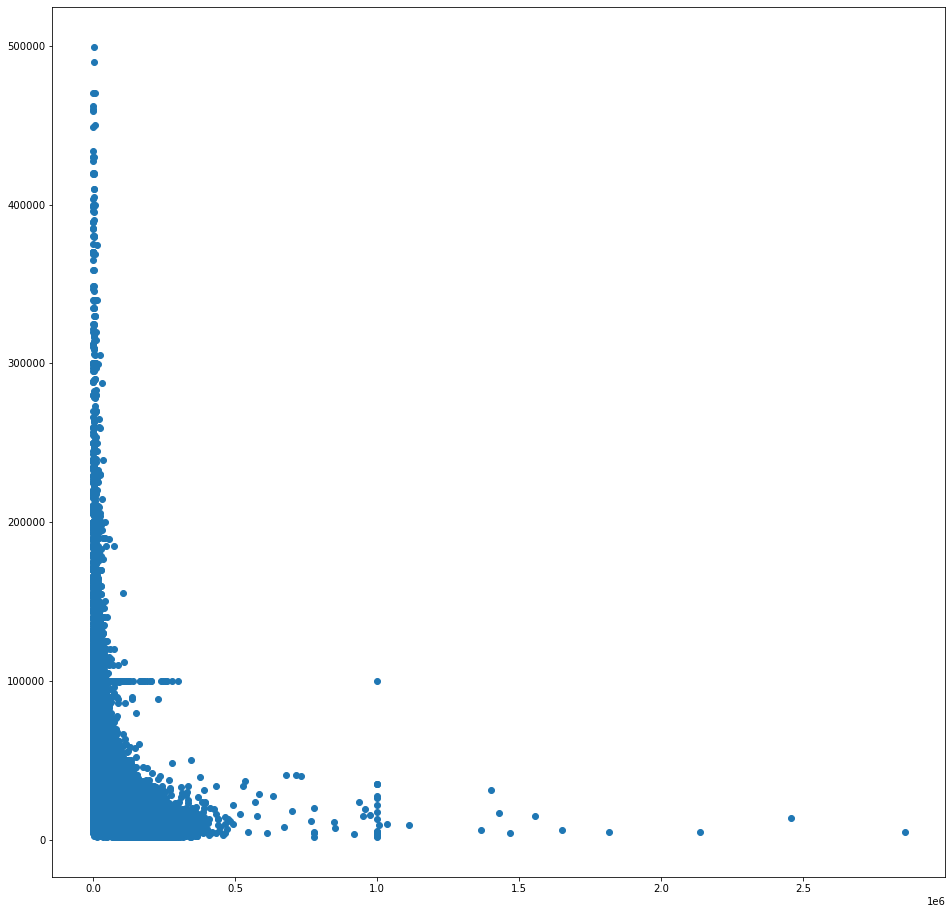

In [14]:
plt.figure(figsize=(16,16))
plt.scatter(df['MILEAGE'],df['PRICE']) #Scatter plot dipicting millage to price

<Figure size 1440x1440 with 0 Axes>

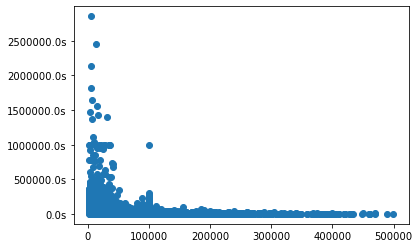

In [15]:
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.scatter(df['PRICE'],df['MILEAGE'])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1fs'))
plt.show()



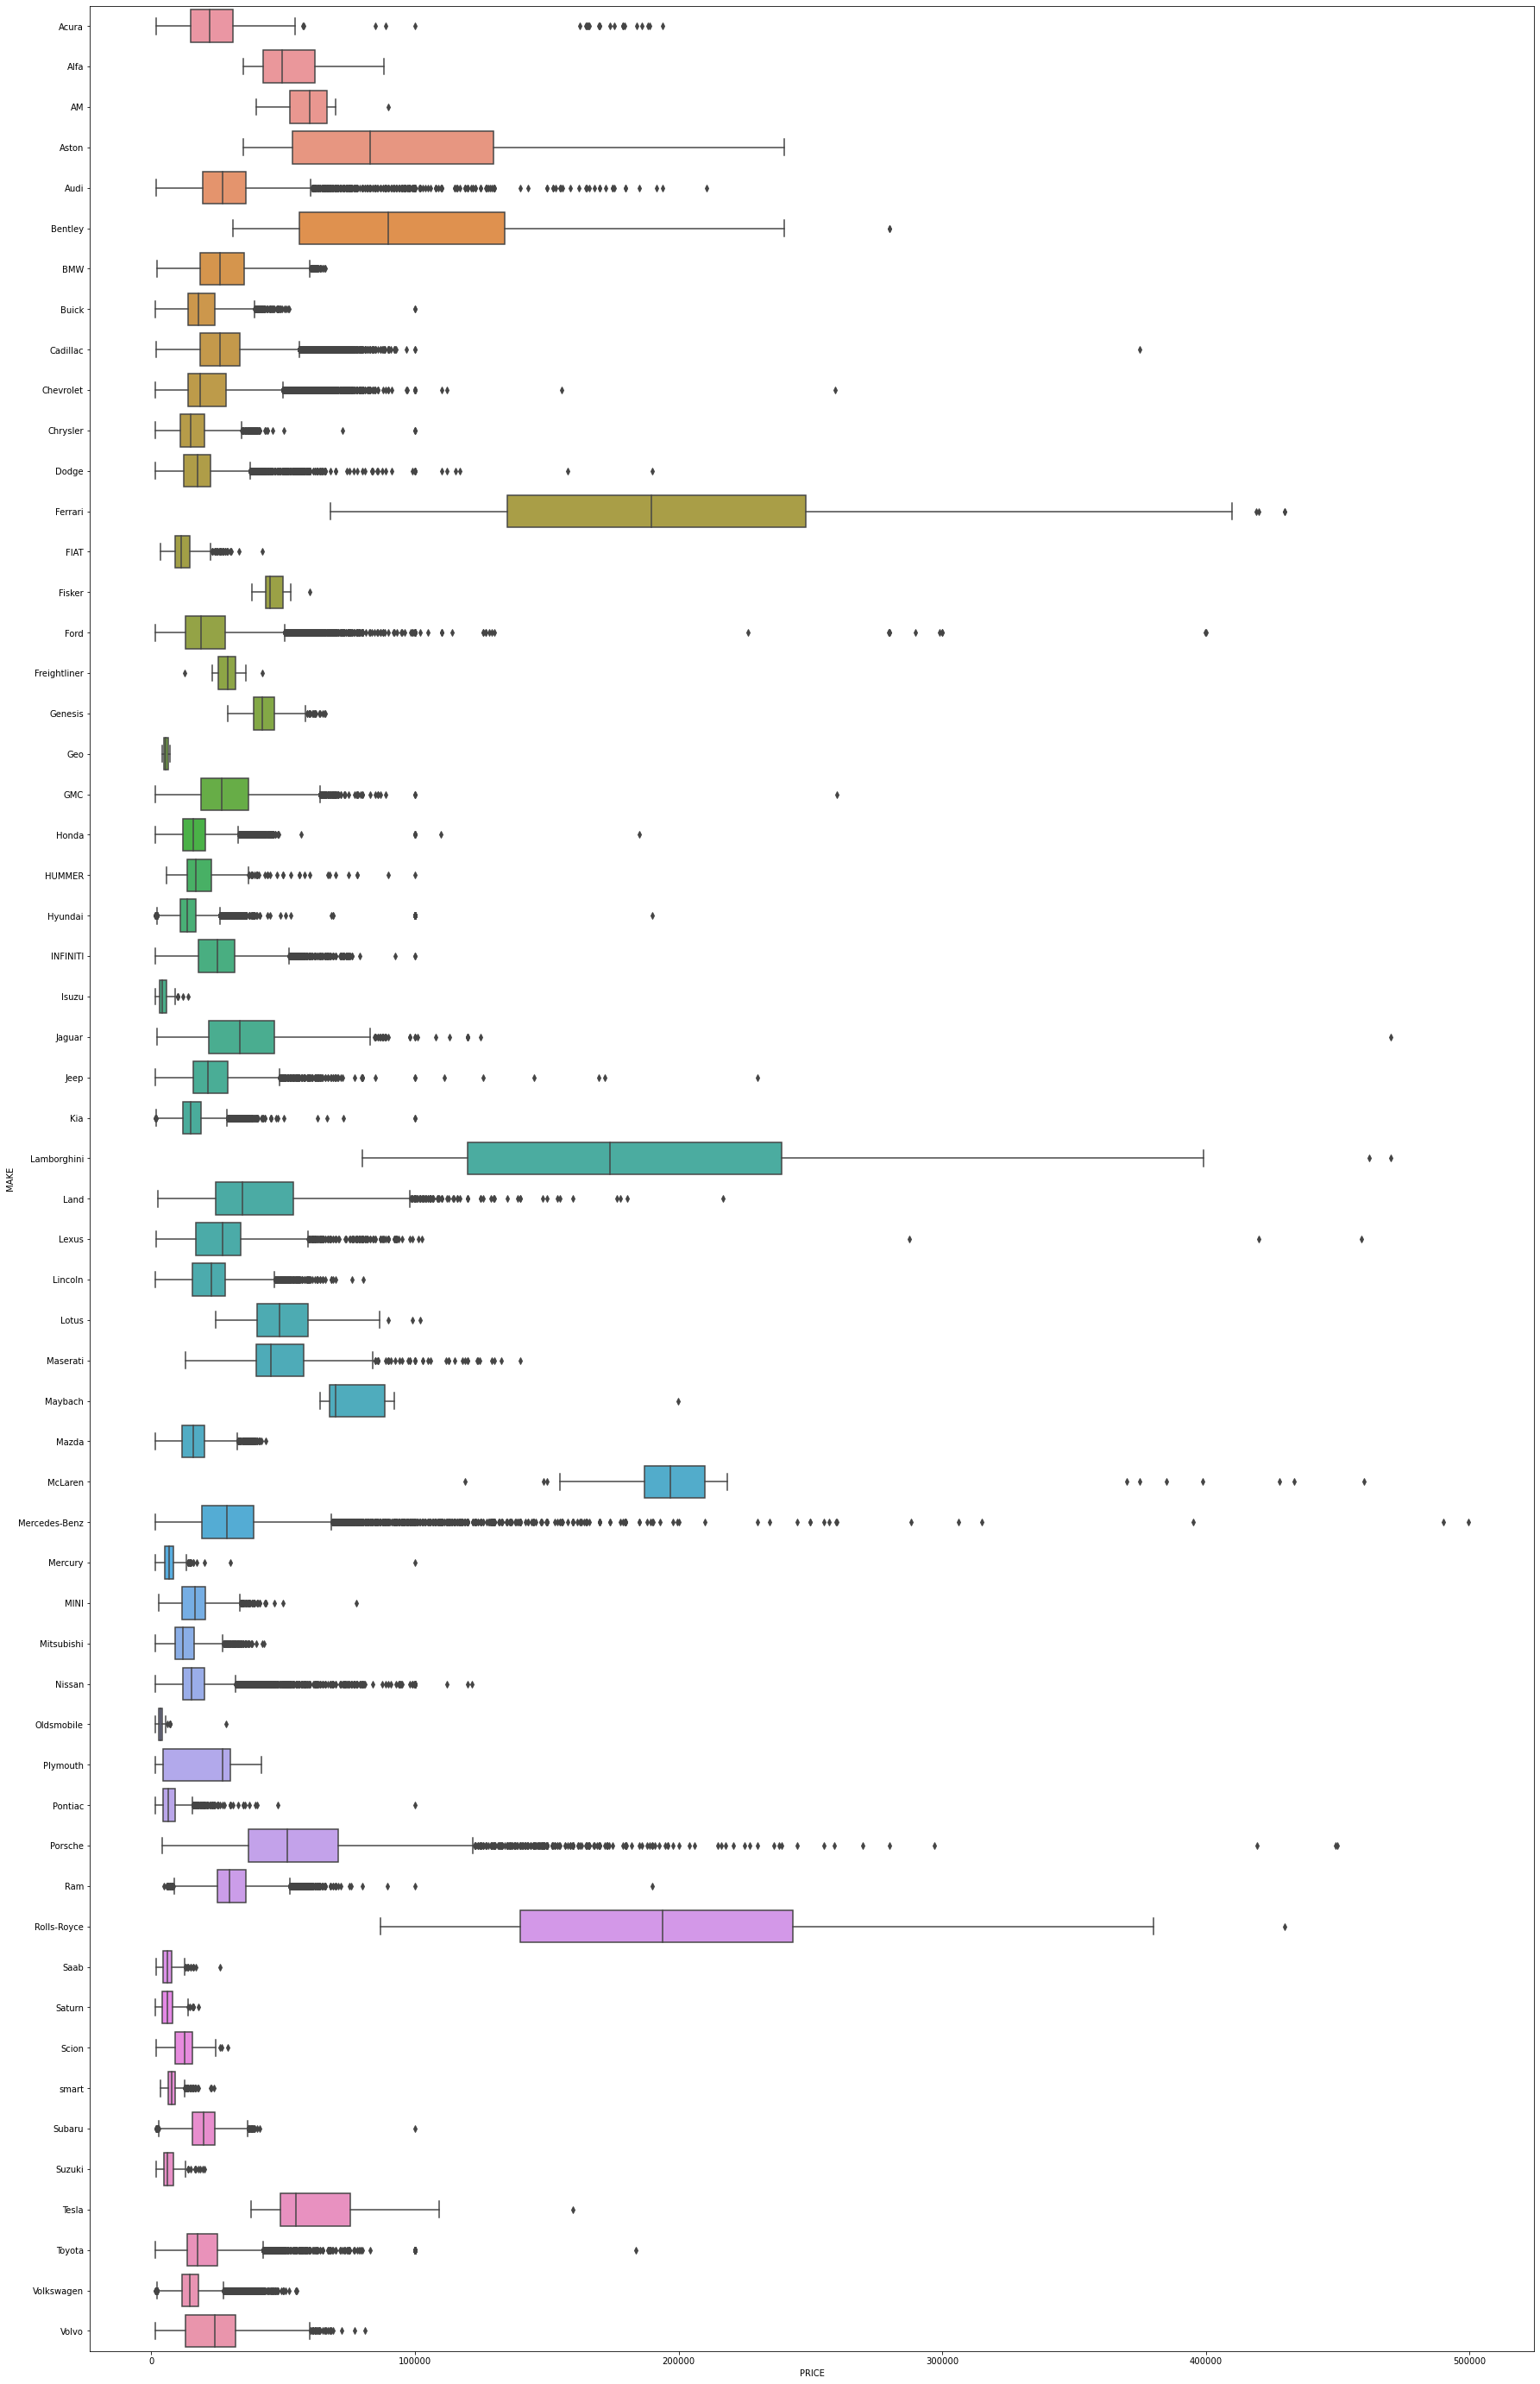

In [16]:
plt.rcParams['figure.figsize']=(30,50) #figure size 23,10
ax = sns.boxplot(x="PRICE", y="MAKE", data=df) #boxplot for make and price

In [17]:
df=df[df['PRICE'] < 100000] #REMOVE PRICE GRATHER THAN 100000 (outliers)

In [18]:
df=df[df['MILEAGE'] < 175000] #remove millage grather tan 175000 miles (outliers)

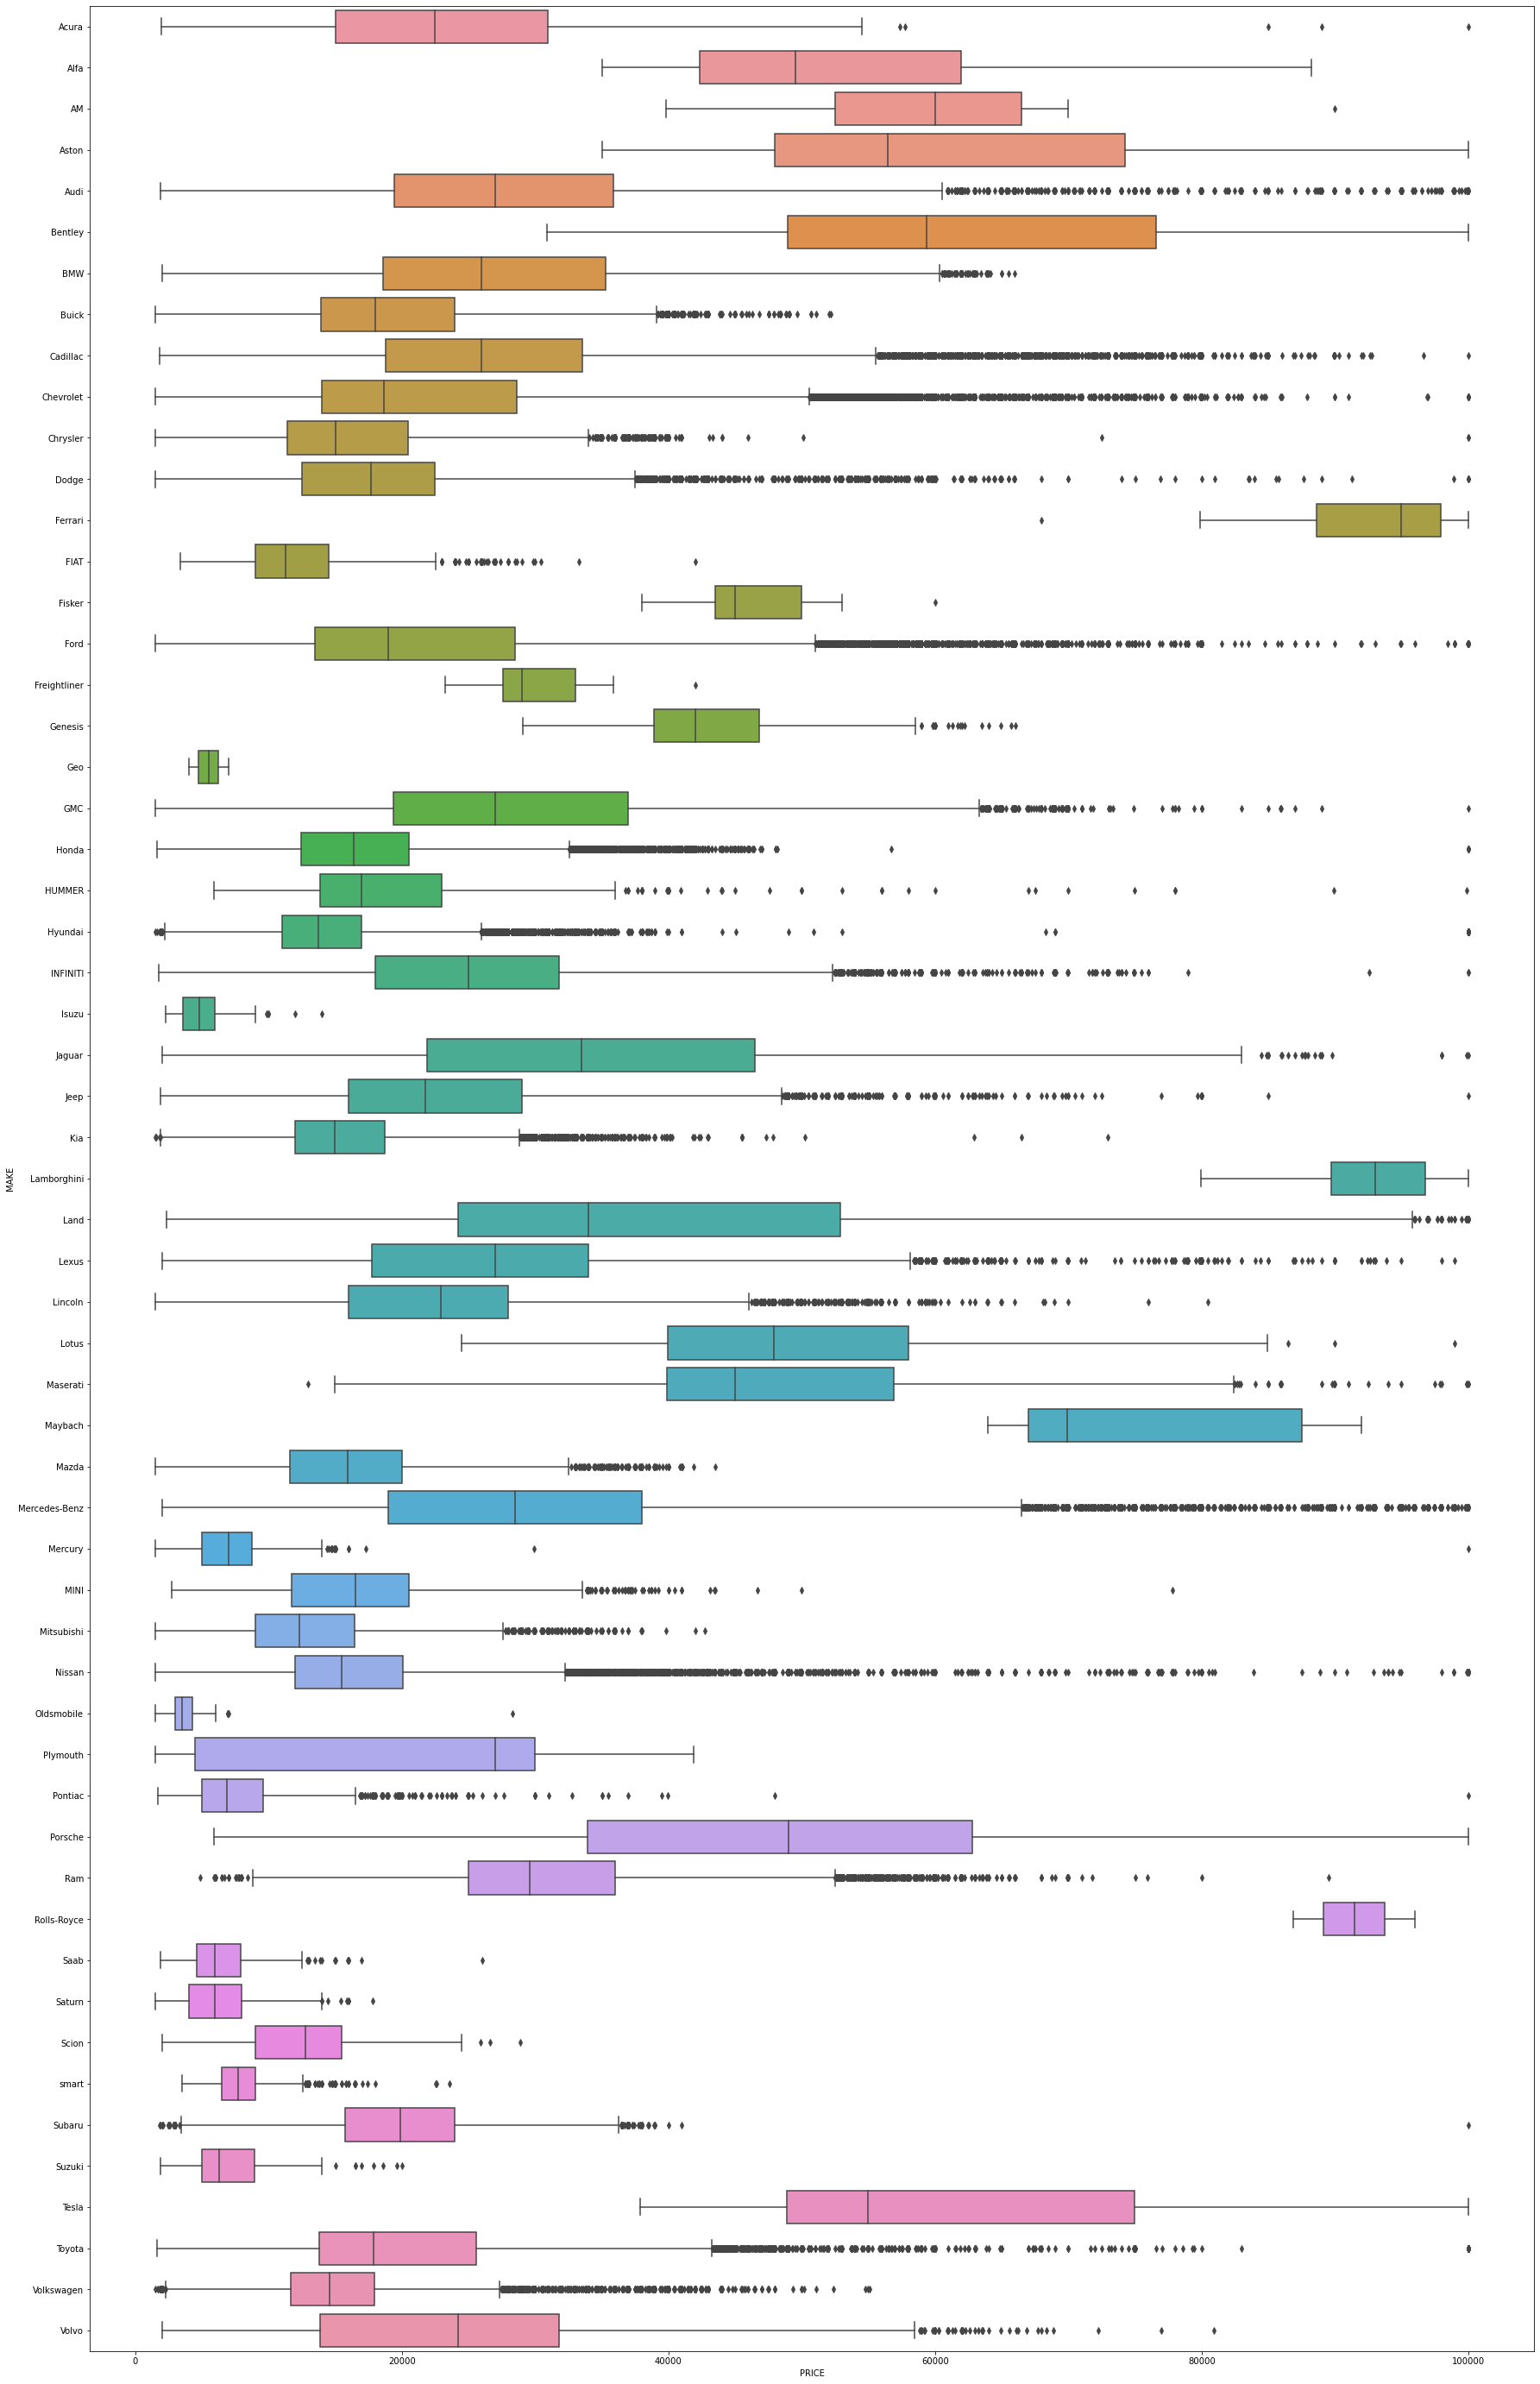

In [19]:
#post outlier removal box plot
plt.rcParams['figure.figsize']=(30,50) #figure size 23,10
ax = sns.boxplot(x="PRICE", y="MAKE", data=df) #boxplot for make and price

In [20]:
#pd.concat(g for _, g in df.groupby('VIN') if len(g) > 1 ) #MEMORY PROBLEMS SO DEIVIDING THE DATA SET BY YEAR

C:\Users\rdanda\AppData\Roaming\Python\Python36\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\rdanda\AppData\Roaming\Python\Python36\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\rdanda\AppData\Roaming\Python\Python36\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users

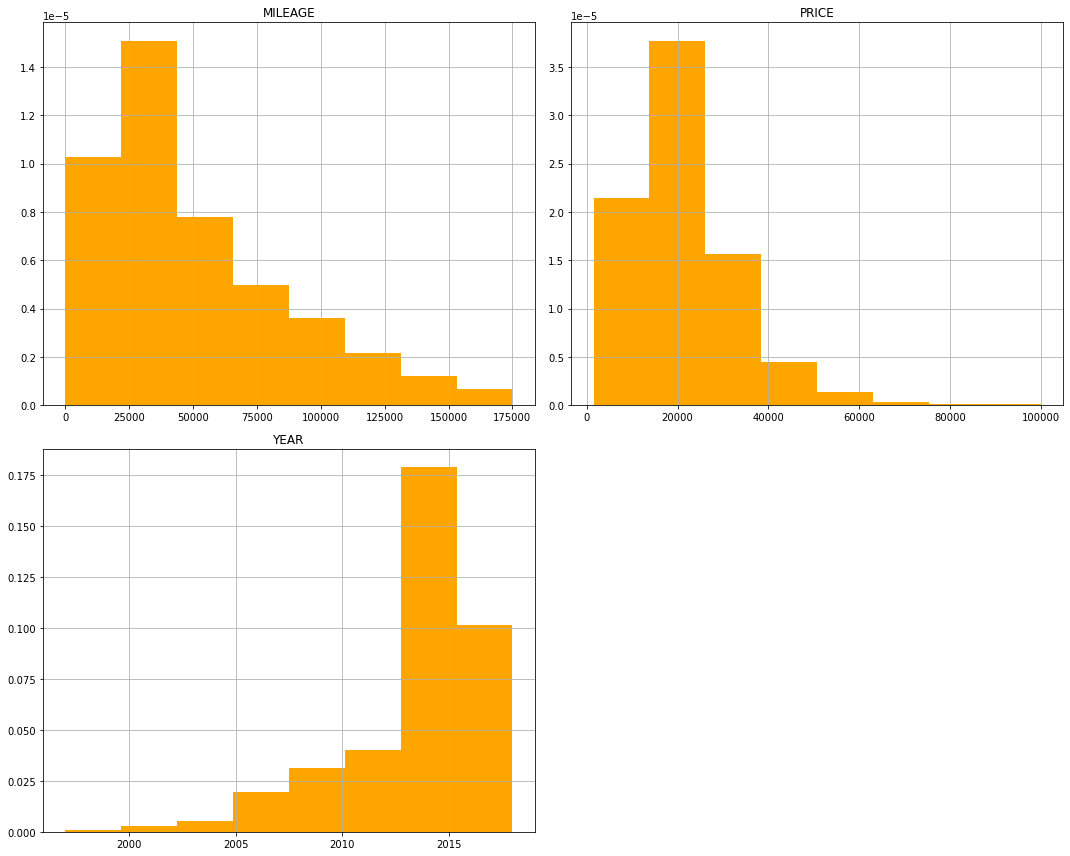

In [21]:
df.hist(bins=8,figsize=(15,12), color='orange',density=True) #Histogram of milleage , price and year of cars
plt.tight_layout()

In [24]:
pd.concat(g for _, g in df2014.groupby('VIN') if len(g) > 1 ) #Find duplicates using unique VIN number of vehicles

,PRICE,YEAR,MILEAGE,CITY,STATE,VIN,MAKE,MODEL,PRICEwc,MILAGEwc
249446,13902,2016,30364,Manvel,TX,1FADP3F21GL319896,Ford,FocusSedan,"13,902","30,364"
252359,13902,2016,30364,Manvel,TX,1FADP3F21GL319896,Ford,FocusSedan,"13,902","30,364"
249445,13588,2016,22345,Madison,TN,1FADP3F24GL320976,Ford,FocusSedan,"13,588","22,345"
252358,13588,2016,22345,Madison,TN,1FADP3F24GL320976,Ford,FocusSedan,"13,588","22,345"
249438,16767,2017,9899,Hanford,CA,1FADP3K2XHL216581,Ford,FocusSE,"16,767","9,899"
252348,16767,2017,9899,Hanford,CA,1FADP3K2XHL216581,Ford,FocusSE,"16,767","9,899"
249433,14929,2016,32175,Corpus Christi,TX,1FMCU0F75GUA44645,Ford,EscapeFWD,"14,929","32,175"
252342,14929,2016,32175,Corpus Christi,TX,1FMCU0F75GUA44645,Ford,EscapeFWD,"14,929","32,175"
249437,14499,2016,21108,West Palm Beach,FL,1FMCU0GX9GUA19732,Ford,EscapeFWD,"14,499","21,108"
252347,14499,2016,21108,West Palm Beach,FL,1FMCU0GX9GUA19732,Ford,EscapeFWD,"14,499","21,108"


In [25]:
df.drop_duplicates(keep=False,inplace=True) #remove duplicates in the entire dataframe

In [26]:
df.size #852122 prior to removing 8378440 after removing DUPLICATES

8378440

In [27]:
df_grp=df.groupby([df.YEAR,df.MAKE]) #Group by year and make

In [28]:
df_grp['MODEL'].describe()

count unique            top freq
YEAR MAKE                                       
1997 AM             4      1        General    4
     Acura          6      4    CLAutomatic    2
     Audi           1      1          A64dr    1
     BMW           14      3              3   10
     Buick         10      4     LeSabre4dr    7
...               ...    ...            ...  ...
2018 Porsche        3      3       MacanGTS    1
     Subaru        20      8  Crosstrek2.0i    5
     Toyota        54      8        C-HRXLE   25
     Volkswagen    15      4      Atlas3.6L    9
     Volvo         13      7          S60T5    5

[860 rows x 4 columns]

In [103]:
df_grp['PRICE'].describe()

count          mean           std      min       25%  \
YEAR MAKE                                                               
1997 AM            4.0  62489.250000   6247.324301  54990.0  58732.50   
     Acura         6.0   4012.500000    842.728841   2991.0   3378.75   
     Audi          1.0   4977.000000           NaN   4977.0   4977.00   
     BMW          14.0  10214.857143   9224.092591   2988.0   5446.00   
     Buick        10.0   3469.200000   1414.756736   1955.0   2622.00   
...                ...           ...           ...      ...       ...   
2018 Porsche       3.0  82648.000000  13050.801010  68995.0  76472.50   
     Subaru       20.0  28596.500000   3310.686644  24917.0  25348.75   
     Toyota       54.0  24331.648148   2853.752169  19822.0  22385.75   
     Volkswagen   15.0  37679.533333   6520.808494  24800.0  34334.00   
     Volvo        13.0  50383.307692   8053.037433  39435.0  43285.00   

                     50%       75%      max  
YEAR MAKE                                    
1997 AM          62989.5  66746.25  68988.0  
     Acura        3992.5   4695.50   4995.0  
     Audi         4977.0   4977.00   4977.0  
     BMW          7277.0   8974.25  32995.0  
     Buick        2997.0   3687.25   6464.0  
...                  ...       ...      ...  
2018 Porsche     83950.0  89474.50  94999.0  
     Subaru      28241.0  31097.00  35900.0  
     Toyota      23974.0  25445.00  32995.0  
     Volkswagen  37995.0  39997.50  50150.0  
     Volvo       51555.0  53991.00  66240.0  

[860 rows x 8 columns]

In [42]:
dfvincheck=(df['VIN'].apply(len) !=17) #checking if VIN number is more than the standard 17 charector length

In [44]:
dfvincheck.count() #confirms all values in dataset conforms to 17 digit vin number format

837844

In [96]:

#Fuzzy matching 

In [102]:
facura=df[(df['MODEL'].str.contains('base')) ] #crate a DF with model that has word 'base'

In [103]:
facura

,PRICE,YEAR,MILEAGE,CITY,STATE,VIN,MAKE,MODEL,PRICEwc,MILAGEwc
701536,37970,2013,62329,Marietta,GA,WP0AA2A79DL011429,Porsche,Panamerabase,"37,970","62,329"
701547,35990,2013,87664,Indianapolis,IN,WP0AA2A72DL018349,Porsche,Panamerabase,"35,990","87,664"
701588,38893,2013,60130,Marietta,GA,WP0AA2A70DL015417,Porsche,Panamerabase,"38,893","60,130"
701630,38995,2013,61777,San Diego,CA,WP0AA2A72DL010221,Porsche,Panamerabase,"38,995","61,777"
701707,39990,2013,60756,Indianapolis,IN,WP0AA2A72DL017184,Porsche,Panamerabase,"39,990","60,756"
701740,41994,2013,49517,Chantilly,VA,WP0AA2A79DL016744,Porsche,Panamerabase,"41,994","49,517"
701866,41999,2013,57534,Marietta,GA,WP0AA2A72DL012292,Porsche,Panamerabase,"41,999","57,534"
701936,41900,2013,65370,Los Angeles,CA,WP0AA2A73DL011197,Porsche,Panamerabase,"41,900","65,370"
701943,41985,2013,65768,Atlanta,GA,WP0AA2A79DL012502,Porsche,Panamerabase,"41,985","65,768"
701951,43995,2013,42983,Teterboro,NJ,WP0AA2A77DL013082,Porsche,Panamerabase,"43,995","42,983"


In [147]:
originalvalue='base' #comparing word (original word to compare)
for v in facura['MODEL']: #get model from above created DF with modles that has word 'base' in model column

        print("Fuzzy Matching word is '{}' and vehicle Model word is '{}' & distance is {}".format(originalvalue,v, distance(originalvalue,v))) #get distance of each mathing.


Fuzzy Matching word is 'base' and vehicle Model word is 'Panamerabase' & distance is 8
Fuzzy Matching word is 'base' and vehicle Model word is 'Panamerabase' & distance is 8
Fuzzy Matching word is 'base' and vehicle Model word is 'Panamerabase' & distance is 8
Fuzzy Matching word is 'base' and vehicle Model word is 'Panamerabase' & distance is 8
Fuzzy Matching word is 'base' and vehicle Model word is 'Panamerabase' & distance is 8
Fuzzy Matching word is 'base' and vehicle Model word is 'Panamerabase' & distance is 8
Fuzzy Matching word is 'base' and vehicle Model word is 'Panamerabase' & distance is 8
Fuzzy Matching word is 'base' and vehicle Model word is 'Panamerabase' & distance is 8
Fuzzy Matching word is 'base' and vehicle Model word is 'Panamerabase' & distance is 8
Fuzzy Matching word is 'base' and vehicle Model word is 'Panamerabase' & distance is 8
Fuzzy Matching word is 'base' and vehicle Model word is 'Panamerabase' & distance is 8
Fuzzy Matching word is 'base' and vehicle M